In [7]:
library(rdhs)
library(survival)
library(dplyr)
library(haven)
library(tidyr)
library(ktools)
library(jsonlite)
library(magrittr)


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union



Attache Paket: 'ktools'


Das folgende Objekt ist maskiert 'package:dplyr':

    compute


Die folgenden Objekte sind maskiert von 'package:base':

    remove, table


Warning message:
"Paket 'jsonlite' wurde unter R Version 4.1.2 erstellt"
Warning message:
"Paket 'magrittr' wurde unter R Version 4.1.2 erstellt"

Attache Paket: 'magrittr'


Das folgende Objekt ist maskiert 'package:tidyr':

    extract




In [28]:
df %>%
    filter(unions == 2) %>%
    mutate(age = (doi_cmc - dob_cmc) / 12) %>%
    head(1) %>%
    allot(xx)
xx

,caseid,dob_cmc,doi_cmc,unions,afs,marital_status,marriage_age,age
,<chr>,<int>,<int>,<int+lbl>,<int+lbl>,<fct>,<int>,<dbl>
1,1001 5 1,773,1207,2,15,divorced,15,36.16667


In [34]:
tibble(
    age = 36,
    unions = 2,
    afs = 15,
    aam = 15,
    marital_status = "divorced"
) %>%
    uncount(18, .id = "episode") %>%
    mutate()

age,unions,afs,aam,marital_status,episode
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
36,2,15,15,divorced,1
36,2,15,15,divorced,2
36,2,15,15,divorced,3
36,2,15,15,divorced,4
36,2,15,15,divorced,5
36,2,15,15,divorced,6
36,2,15,15,divorced,7
36,2,15,15,divorced,8
36,2,15,15,divorced,9


In [29]:
ktools::surv_split

function (x, duration, event, cuts, time_varying = NULL, label_episode = FALSE) 
{
    if (any(cuts < 0)) 
        stop("negative time is not supported")
    x$n_dup <- kut(x[, duration], cuts, include.lowest = TRUE)
    episode_labs <- levels(x$n_dup)
    x <- unkount(x, n_dup)
    x$n_dup <- NULL
    episode <- gsub("[0-9]*\\.?(.*)", "\\1", rownames(x), perl = TRUE)
    episode[episode == ""] <- "0"
    x$episode <- as.numeric(episode) + 1
    x$t_start <- c(0, cuts)[x$episode]
    x$t_end <- c(x$t_start[2L:nrow(x)], 0)
    x$t_end[x$t_end == 0] <- x[, duration][x$t_end == 0]
    x[, event] <- x[, event] * (x$t_end == x[, duration])
    if (label_episode) 
        x$episode <- factor(x$episode, seq_along(episode_labs), 
            episode_labs)
    x
}
<bytecode: 0x7fe687d45268>
<environment: namespace:ktools>

In [18]:
ts <- readRDS(here::here("data/marriage_epis_durspl.rds"))
ts %>% head()

,caseid,sex,dob_cmc,doi_cmc,eversex,first_sex_cmc,first_union_cmc,time_start,time_end,event,duration,episode,t_start,t_end,age_start,age_end
,<chr>,<chr>,<int>,<int>,<lgl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1 60 3,male,1138,1393,TRUE,1354,NA,1354,1360,0,6,1,0,6,216,222
1.1,1 60 3,male,1138,1393,TRUE,1354,NA,1360,1366,0,6,2,6,12,222,228
1.2,1 60 3,male,1138,1393,TRUE,1354,NA,1366,1372,0,6,3,12,18,228,234
1.3,1 60 3,male,1138,1393,TRUE,1354,NA,1372,1378,0,6,4,18,24,234,240
1.4,1 60 3,male,1138,1393,TRUE,1354,NA,1378,1384,0,6,5,24,30,240,246
1.5,1 60 3,male,1138,1393,TRUE,1354,NA,1384,1390,0,6,6,30,36,246,252


# Assumptions

In [8]:
states <- char(virgin, debut, married, separated, divorced, widowed,remarried)
rbind(
    c(-2, 1, 1, 0, 0, 0, 0),
    c(0, -1, 1, 0, 0, 0, 0),
    c(0, 0, -3, 1, 1, 1, 0),
    c(0, 0, 0, -1, 0, 0, 1),
    c(0, 0, 0, 0, -1, 0, 1),
    c(0, 0, 0, 0, 0, -1, 1),
    c(0, 0, 0, 1, 1, 1, -3)
) %>%
    as.matrix() %>%
    set_colnames(states) %>%
    set_rownames(states) %>% print()

          virgin debut married separated divorced widowed remarried
virgin        -2     1       1         0        0       0         0
debut          0    -1       1         0        0       0         0
married        0     0      -3         1        1       1         0
separated      0     0       0        -1        0       0         1
divorced       0     0       0         0       -1       0         1
widowed        0     0       0         0        0      -1         1
remarried      0     0       0         1        1       1        -3


# Simplest data

In [9]:
ir <- readRDS('~/ir.rds')

In [10]:
df <- ir %>%
  transmute(
    caseid, 
    dob_cmc = v011,
    doi_cmc = v008,
    unions = v503,
    afs = v531,
    marital_status = as_factor(v501),
    marriage_age = v511,
  )

df %>% count(marital_status)
df %>% count(unions) %>% print

marital_status,n
<fct>,<int>
never married,2284
married,9155
living together,206
widowed,486
divorced,622
not living together,467


  unions    n
1      1 8084
2      2 2837
3      9   15
4     NA 2284


Put into `msm` format

- never had sex individual has two records: zero and current age both in state virgin??

In [9]:
df %>%
  as_tibble() %>%
  mutate(age = (doi_cmc - dob_cmc) / 12) %>%
  select(
    id = caseid,
    age, afs, 
    aam = marriage_age, 
    current = marital_status,
    unions
  ) %>% 
  filter(afs < 97) %>%
  mutate(
    afs = as.numeric(afs), 
    aam = as.numeric(aam),
    afs = if_else(afs != 0 & afs >= aam, NA_real_, afs), # let them move virgin > married 
    S_born = 0,
    S_virgin = if_else(afs == 0 | (is.na(afs) & current == 'never married'), age, NA_real_),
    S_debut = if_else(afs > 0, afs, NA_real_),
    S_married = aam,
    S_divorced = if_else(current == "divorced", age, NA_real_),
    S_widowed = if_else(current == "widowed", age, NA_real_),
    S_separated = if_else(current == "not living together", age, NA_real_)
  ) %>%
  allot(msm_wide)
msm_wide %>% head(30)

id,age,afs,aam,current,unions,S_born,S_virgin,S_debut,S_married,S_divorced,S_widowed,S_separated
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<int+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001 1 4,16.91667,0,NA,never married,NA,0,16.91667,NA,NA,NA,NA,NA
1001 5 1,36.16667,NA,15,divorced,2,0,NA,NA,15,36.16667,NA,NA
1001 6 2,26.08333,NA,14,married,1,0,NA,NA,14,NA,NA,NA
1001 7 2,30.58333,NA,17,married,1,0,NA,NA,17,NA,NA,NA
1001 9 2,24.25000,NA,19,married,1,0,NA,NA,19,NA,NA,NA
100110 2,32.33333,NA,18,married,1,0,NA,NA,18,NA,NA,NA
100111 1,27.50000,NA,17,married,1,0,NA,NA,17,NA,NA,NA
100112 2,21.08333,NA,14,married,1,0,NA,NA,14,NA,NA,NA
100114 3,26.91667,NA,15,married,1,0,NA,NA,15,NA,NA,NA


In [13]:
msm_wide %>%
  select(id, age, unions, starts_with('S_')) %>%
  pivot_longer(
    -c(id, age, unions),
    names_sep = "_",
    names_to = c(NA, "state"),
    values_to = "time"
  ) %>%
  mutate(state = if_else(state == 'born', 'virgin', state)) %>%
  mutate(
    time = as.numeric(time), 
    state = factor(state, levels = c("virgin", 'debut', "married", "separated", "divorced", "widowed"))
  ) %>%
  drop_na() %>%
  mutate(staten = as.numeric(state)) %>%
  allot(female_msm)

female_msm %>% head(30)

id,age,unions,state,time,staten
<chr>,<dbl>,<int+lbl>,<fct>,<dbl>,<dbl>
1001 5 1,36.16667,2,virgin,0.00000,1
1001 5 1,36.16667,2,married,15.00000,3
1001 5 1,36.16667,2,divorced,36.16667,5
1001 6 2,26.08333,1,virgin,0.00000,1
1001 6 2,26.08333,1,married,14.00000,3
1001 7 2,30.58333,1,virgin,0.00000,1
1001 7 2,30.58333,1,married,17.00000,3
1001 9 2,24.25000,1,virgin,0.00000,1
1001 9 2,24.25000,1,married,19.00000,3


Observed transition

In [35]:
library(msm)

statetable.msm(state, id, data=female_msm)

    to
from virgin debut married separated divorced widowed
   1   2279  3876    6680         0        0       0
   2      0     0    3876         0        0       0
   3      0     0       0       447      590     466

# Model

Intensity matrix - starting values

In [37]:
Qp <- rbind(
  c(0, 0.1, 0.1, 0, 0, 0),
  c(0, 0, .1, 0, 0, 0),
  c(0, 0, 0, 0.1, 0.1, 0.1),
  c(0, 0, 0.1, 0, 0, 0),
  c(0, 0, 0.1, 0, 0, 0),
  c(0, 0, 0.1, 0, 0, 0)
)

Q.crude <- crudeinits.msm(staten ~ time, id, data = female_msm, qmatrix = Qp)
Q.crude

-0.04976687,0.01827362,0.03149324,0.00000000,0.00000000,0.00000000
0.00000000,-0.29035883,0.29035883,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,-0.06598110,0.01962312,0.02590076,0.02045721
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


> There is no data on the last three rows: Divorced/Widowed/Separated -> Married.

Fit the model

> note that `fnscale` need to be set in this data to avoid numerical overflow (why?)

In [38]:
msm <- msm(staten ~ time,
  subject = id, data = female_msm, qmatrix = Qp,
  control = list(fnscale = 10000)
)

Warning message in msm.optim.optim(p = list(inits = c(qbase = -2.30258509299405, :
"Iteration limit in optim() reached without convergence. Reported estimates are not the maximum likelihood. Increase "maxit" or change optimisation method - see help(optim) and help(msm)."


In [39]:
msm


Call:
msm(formula = staten ~ time, subject = id, data = female_msm,     qmatrix = Qp, control = list(fnscale = 10000))

Maximum likelihood estimates

Transition intensities
                  Baseline                          
State 1 - State 1 -9.073e-02 (-9.268e-02,-8.883e-02)
State 1 - State 2  9.073e-02 ( 8.883e-02, 9.268e-02)
State 1 - State 3  1.953e-08 ( 6.235e-44, 6.115e+27)
State 2 - State 2 -2.106e-01 (-2.170e-01,-2.044e-01)
State 2 - State 3  2.106e-01 ( 2.044e-01, 2.170e-01)
State 3 - State 3 -2.162e-02 (-2.279e-02,-2.052e-02)
State 3 - State 4  6.439e-03 ( 5.854e-03, 7.083e-03)
State 3 - State 5  8.487e-03 ( 7.821e-03, 9.209e-03)
State 3 - State 6  6.697e-03 ( 6.110e-03, 7.340e-03)
State 4 - State 3  3.989e-04 ( 1.379e-07, 1.153e+00)
State 4 - State 4 -3.989e-04 (-1.153e+00,-1.379e-07)
State 5 - State 3  5.085e-07 ( 2.176e-42, 1.188e+29)
State 5 - State 5 -5.085e-07 (-1.188e+29,-2.176e-42)
State 6 - State 3  5.664e-05 ( 2.903e-07, 1.105e-02)
State 6 - State 6 -5.664e-05 (-

Transition probability

In [40]:
pmatrix.msm(msm, t=5) %>% round(2)

        State 1 State 2 State 3 State 4 State 5 State 6
State 1    0.64    0.22    0.14    0.00    0.00    0.00
State 2    0.00    0.35    0.61    0.01    0.02    0.01
State 3    0.00    0.00    0.90    0.03    0.04    0.03
State 4    0.00    0.00    0.00    1.00    0.00    0.00
State 5    0.00    0.00    0.00    0.00    1.00    0.00
State 6    0.00    0.00    0.00    0.00    0.00    1.00

If currently virgin, 
- probability of making sexual debut 5 years from now is 0.26
- probability of married (without sexual debut) 5 years from now is 0.08

In [41]:
gd <- purrr::map_dfr(
    1:30,
    function(x) {
        pmatrix.msm(msm, t = x) %>%
            unclass() %>%
            as_tibble() %>%
            mutate(state = 1:n(), time = x)
    }
)
head(gd)

State 1,State 2,State 3,State 4,State 5,State 6,state,time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9132612,0.07809026,8.584955e-03,1.892553e-05,2.494571e-05,1.968459e-05,1,1
0.0000000,0.81011290,1.877778e-01,6.280933e-04,8.279172e-04,6.533042e-04,2,1
0.0000000,0.00000000,9.786111e-01,6.368724e-03,8.395434e-03,6.624723e-03,3,1
0.0000000,0.00000000,3.945245e-04,9.996025e-01,1.680215e-06,1.325848e-06,4,1
0.0000000,0.00000000,5.030296e-07,1.625151e-09,9.999995e-01,1.690379e-09,5,1
0.0000000,0.00000000,5.603151e-05,1.810242e-07,2.386154e-07,9.999435e-01,6,1


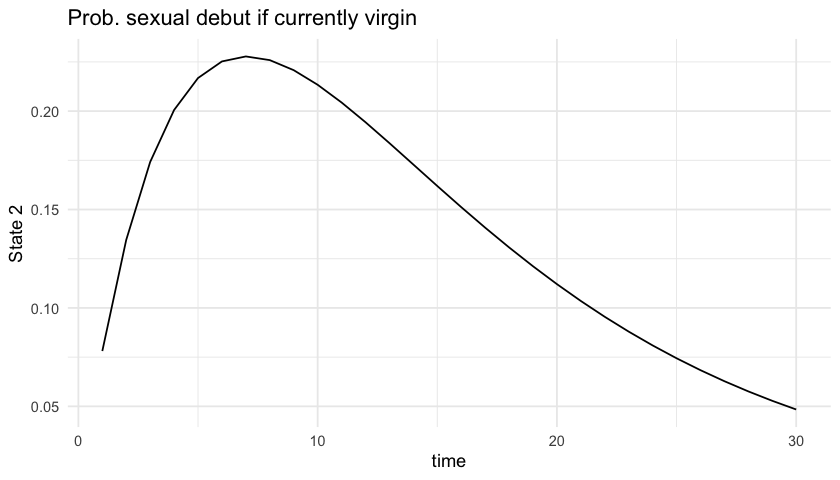

In [43]:
ktools::sizing(7, 4)
gd %>%
    filter(`State 2` != 0, state == 1) %>%
    ggplot(aes(time, `State 2`)) +
    geom_line() +
    labs(title = "Prob. sexual debut if currently virgin")

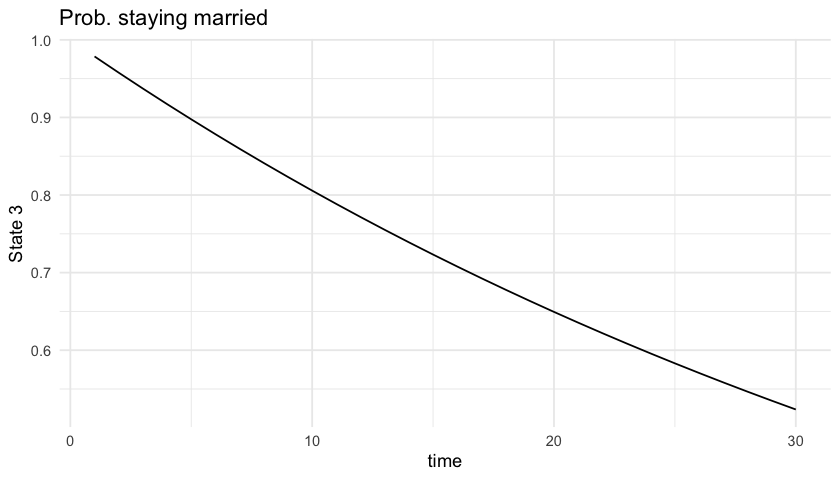

In [48]:
gd %>%
    filter(state == 3) %>%
    ggplot(aes(time, `State 3`)) +
    geom_line() +
    labs(title = "Prob. staying married")

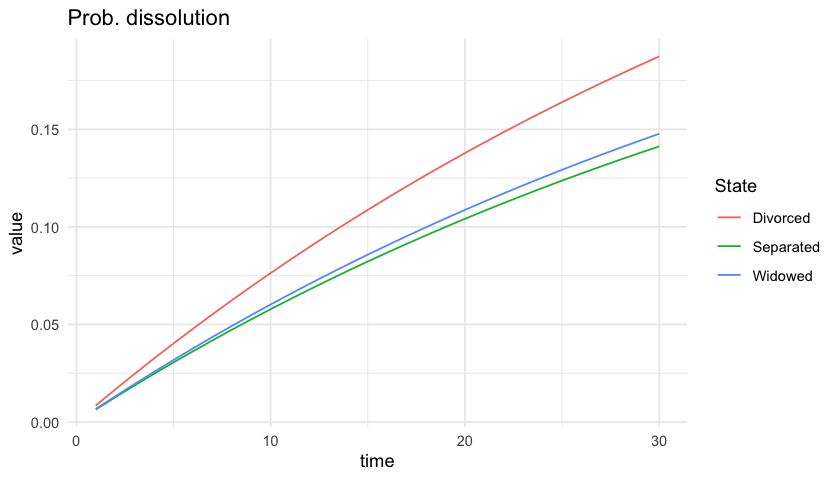

In [47]:
gd %>%
    filter(state == 3) %>%
    select(4:8) %>%
    rename_with(~ char(S_Separated, S_Divorced, S_Widowed, state, time)) %>%
    pivot_longer(starts_with('S_'), names_to = c(NA, "State"), names_sep = '_') %>%
    ggplot(aes(time, value, color = State)) +
    geom_line() +
    labs(title = "Prob. dissolution")

Average time stays within each state

$-1/q_{rr}$

In [30]:
sojourn.msm(msm)

$estimates
  State 1   State 2   State 3   State 4   State 5   State 6 
 5.000000 10.000000  3.333333 10.000000 10.000000 10.000000

Probability that each state is next $-q_{rs}/q_{rr}$

In [31]:
pnext.msm(msm)

        State 1 State 2 State 3 State 4 State 5 State 6
State 1 0.0000  0.5000  0.5000  0.0000  0.0000  0.0000 
State 2 0.0000  0.0000  1.0000  0.0000  0.0000  0.0000 
State 3 0.0000  0.0000  0.0000  0.3333  0.3333  0.3333 
State 4 0.0000  0.0000  1.0000  0.0000  0.0000  0.0000 
State 5 0.0000  0.0000  1.0000  0.0000  0.0000  0.0000 
State 6 0.0000  0.0000  1.0000  0.0000  0.0000  0.0000 

Total length of stay $\int_{t_1}^{t_2} P(t)_{r, s}dt$

In [32]:
totlos.msm(msm, end  = 5)

ERROR: Error in totlos.msm(msm, end = 5): Must specify a finite end time for a model with no absorbing state


Hazard ratios for transition

In [33]:
hazard.msm(msm)

[1] "No covariates on transition intensities"